# Exercise 2

## Instructions 

1. Generate train and test data.
2. Define a class NN of one-hidden neural net. The __init__ function takes 3 parameters (inputsize, hiddensize, outputsize).

2. Define a list hidden_size = [2, ...., 33, ....128] with a step 5. Be sure that list contains 33, which corresponds to the case of interpolation threshold, i.e. the number of parameters equals to the number of training points.
3. 

for h in hidden_size:
    define model(inputsize, hiddensize, outputsize)
    for e in epochs:
        forward step: output = model(input)
        compute loss 
        backpropagate loss (use backward)
        
    get train loss (after training): train_out = model(input)
    train_loss = criterion(train_out, labels)
    get test_loss: test_out = model(input)
    test_loss = criterion(test_out, labels)
       
4. Plot saved list of train and test losses, x axis reveals each h, y axis is loss values.
     

In [77]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch
from torch.autograd import Variable
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [78]:
x_values = np.random.normal(size = 200)
x_vals = np.array(x_values, dtype=np.float32)
r = np.random.normal(0, 3, size = 200)

y_values = [3*i + 5 for i in x_values] + r
y_vals = np.array(y_values, dtype=np.float32)


In [79]:
x_train, x_test, y_train, y_test = (train_test_split(x_vals, y_vals, test_size=0.2))

In [80]:
x_train = (x_train).reshape(-1, 1)
x_test = (x_test).reshape(-1, 1)
y_train = (y_train).reshape(-1, 1)
y_test = (y_test).reshape(-1, 1)

In [81]:
x_train.shape

(160, 1)

In [82]:
print(x_train.shape)
print(y_train.shape)

(160, 1)
(160, 1)


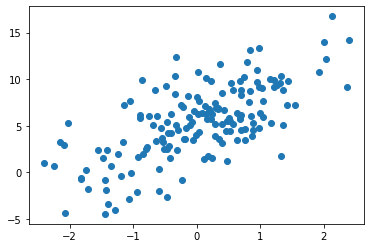

In [83]:
plt.scatter(x_train, y_train)

In [84]:
class NN(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(NN, self).__init__()
        self.linear = nn.Sequential(torch.nn.Linear(inputSize, hiddenSize),
                                    torch.nn.Linear(hiddenSize, outputSize))
                                    

    def forward(self, x):
        out = self.linear(x)
        return out

In [85]:
inputDim = 1
hidden_sizes = 128
outputDim = 1      
learningRate = 0.001 
epochs = 101



In [86]:
criterion = torch.nn.MSELoss() 

In [87]:
#!!! Note that training in the code below done outside of epoch loop.
hs = []
train_losses = []
test_losses = []
for h in range(2, hidden_sizes, 1):
    hs.append(h)
    model = NN(inputDim, h, outputDim)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
    for epoch in range(epochs):
        if torch.cuda.is_available():
            inputs_train = Variable(torch.from_numpy(x_train).cuda())
            labels_train = Variable(torch.from_numpy(y_train).cuda())
        else:
            inputs_train = Variable(torch.from_numpy(x_train))
            labels_train = Variable(torch.from_numpy(y_train))
        if torch.cuda.is_available():
            inputs_test = Variable(torch.from_numpy(x_test).cuda())
            labels_test = Variable(torch.from_numpy(y_test).cuda())
        else:
            inputs_test = Variable(torch.from_numpy(x_test))
            labels_test = Variable(torch.from_numpy(y_test))
        optimizer.zero_grad()
        outputs = model(inputs_train)
        loss = criterion(outputs, labels_train)
        loss.backward()
        optimizer.step()
    for epoch in range(0, epochs, 50):
        print('h: {} | epoch: {}, loss: {}'.format(h, epoch, loss.item()))  
    outputs_train = model(inputs_train)
    train_loss = criterion(inputs_train, labels_train)
    train_losses.append(train_loss)
    outputs_test = model(inputs_test)
    test_loss = criterion(inputs_test, labels_test)
    test_losses.append(test_loss)

h: 2 | epoch: 0, loss: 31.939983367919922
h: 2 | epoch: 50, loss: 31.939983367919922
h: 2 | epoch: 100, loss: 31.939983367919922
h: 3 | epoch: 0, loss: 15.365534782409668
h: 3 | epoch: 50, loss: 15.365534782409668
h: 3 | epoch: 100, loss: 15.365534782409668
h: 4 | epoch: 0, loss: 18.908344268798828
h: 4 | epoch: 50, loss: 18.908344268798828
h: 4 | epoch: 100, loss: 18.908344268798828
h: 5 | epoch: 0, loss: 13.41929817199707
h: 5 | epoch: 50, loss: 13.41929817199707
h: 5 | epoch: 100, loss: 13.41929817199707
h: 6 | epoch: 0, loss: 13.214320182800293
h: 6 | epoch: 50, loss: 13.214320182800293
h: 6 | epoch: 100, loss: 13.214320182800293
h: 7 | epoch: 0, loss: 16.748470306396484
h: 7 | epoch: 50, loss: 16.748470306396484
h: 7 | epoch: 100, loss: 16.748470306396484
h: 8 | epoch: 0, loss: 11.094555854797363
h: 8 | epoch: 50, loss: 11.094555854797363
h: 8 | epoch: 100, loss: 11.094555854797363
h: 9 | epoch: 0, loss: 10.628715515136719
h: 9 | epoch: 50, loss: 10.628715515136719
h: 9 | epoch: 1

h: 66 | epoch: 50, loss: 8.559463500976562
h: 66 | epoch: 100, loss: 8.559463500976562
h: 67 | epoch: 0, loss: 8.550897598266602
h: 67 | epoch: 50, loss: 8.550897598266602
h: 67 | epoch: 100, loss: 8.550897598266602
h: 68 | epoch: 0, loss: 8.551054000854492
h: 68 | epoch: 50, loss: 8.551054000854492
h: 68 | epoch: 100, loss: 8.551054000854492
h: 69 | epoch: 0, loss: 8.55237102508545
h: 69 | epoch: 50, loss: 8.55237102508545
h: 69 | epoch: 100, loss: 8.55237102508545
h: 70 | epoch: 0, loss: 8.549725532531738
h: 70 | epoch: 50, loss: 8.549725532531738
h: 70 | epoch: 100, loss: 8.549725532531738
h: 71 | epoch: 0, loss: 8.551214218139648
h: 71 | epoch: 50, loss: 8.551214218139648
h: 71 | epoch: 100, loss: 8.551214218139648
h: 72 | epoch: 0, loss: 8.554049491882324
h: 72 | epoch: 50, loss: 8.554049491882324
h: 72 | epoch: 100, loss: 8.554049491882324
h: 73 | epoch: 0, loss: 8.549886703491211
h: 73 | epoch: 50, loss: 8.549886703491211
h: 73 | epoch: 100, loss: 8.549886703491211
h: 74 | epoch

In [88]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 8.7539015 ]
 [ 3.192394  ]
 [ 4.0467696 ]
 [ 5.9258676 ]
 [ 7.9749913 ]
 [ 0.69172513]
 [ 8.885546  ]
 [ 4.986133  ]
 [ 6.382226  ]
 [ 6.765833  ]
 [ 3.4695497 ]
 [ 3.3048356 ]
 [ 7.5898333 ]
 [ 3.9317024 ]
 [ 4.751627  ]
 [ 3.1399674 ]
 [ 7.976969  ]
 [ 9.1871605 ]
 [ 7.0144515 ]
 [ 4.0340247 ]
 [ 1.5261338 ]
 [ 0.4044057 ]
 [ 5.652167  ]
 [ 3.5422895 ]
 [ 1.1344388 ]
 [ 4.050249  ]
 [ 4.7123847 ]
 [ 8.141877  ]
 [ 5.1618915 ]
 [ 7.043793  ]
 [ 1.3338617 ]
 [ 6.218323  ]
 [ 5.645574  ]
 [ 8.6246605 ]
 [ 2.8904545 ]
 [ 2.991771  ]
 [-0.14754122]
 [ 8.495579  ]
 [ 7.468     ]
 [ 6.676128  ]
 [ 7.2093954 ]
 [ 6.7428727 ]
 [ 5.8969035 ]
 [ 6.5638833 ]
 [ 7.1408744 ]
 [ 7.649406  ]
 [-0.489692  ]
 [ 7.3398128 ]
 [ 8.109075  ]
 [ 4.0968757 ]
 [ 5.9285083 ]
 [ 3.0169647 ]
 [-0.29273298]
 [ 6.4108987 ]
 [10.7415285 ]
 [ 2.9186628 ]
 [ 6.2976894 ]
 [ 4.6437025 ]
 [ 9.000072  ]
 [ 7.213867  ]
 [ 0.4004282 ]
 [ 5.5308995 ]
 [ 7.5880337 ]
 [ 4.4137907 ]
 [ 6.3791623 ]
 [ 4.8796277 ]
 [ 5.35753

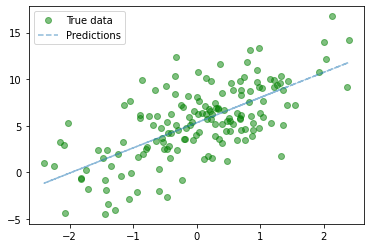

In [89]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

(0.0, 100.0)

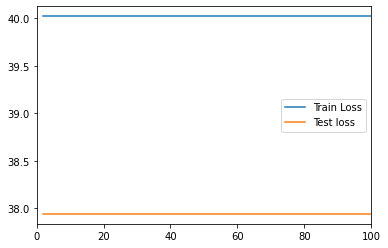

In [90]:
plt.plot(hs, train_losses, label='Train Loss')
plt.plot(hs, test_losses, label='Test loss')
plt.legend(loc='best')
plt.xlim(0, 100)

(0.0, 100.0)

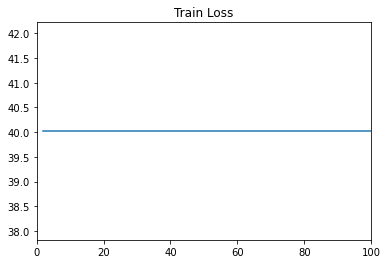

In [91]:
plt.plot(hs, train_losses)
plt.title('Train Loss')
plt.xlim(0, 100)

(0.0, 100.0)

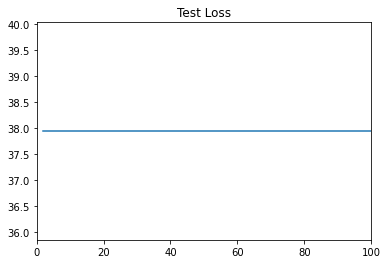

In [92]:
plt.plot(hs, test_losses)
plt.title('Test Loss')
plt.xlim(0, 100)

[]